# ANN 

In [17]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
data = pd.read_csv("F:\\download\\Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
x = data.iloc[:,3:13]
y = data.iloc[:,13]

In [20]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [21]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [22]:
## feature engineerning ,,, in this process there is catigorocal features 
geograpy=pd.get_dummies(x['Geography'],drop_first =True)
gender = pd.get_dummies(x['Gender'],drop_first=True)

In [23]:
x.drop(['Geography','Gender'],axis=1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [24]:
x=x.drop(['Geography','Gender'],axis=1)

In [26]:
## add the dummi variable to dataframe 
x=pd.concat([x,geograpy,gender],axis=1)

In [27]:
## splitting the data set into training set and testing set
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [29]:
## feature scaling 
from sklearn.preprocessing import StandardScaler

In [31]:
sc=StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [38]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [39]:
x_train.shape

(8000, 11)

In [35]:
## create ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [36]:
# ANN
classifier = Sequential()

In [41]:
## add  the input layer
classifier.add(Dense(units=11,activation = 'relu'))
## adding first hiden layer
classifier.add(Dense(units=8,activation = 'relu'))
## adding second hiden layer
classifier.add(Dense(units=6,activation= 'relu'))
## adding output layer
classifier.add(Dense(1,activation = 'sigmoid'))

In [49]:
classifier.compile(optimizer = opt,loss = 'binary_crossentropy',metrics =['accuracy'])

In [50]:
import tensorflow 
opt=tensorflow.keras.optimizers.Adam(learning_rate= 0.01)

In [51]:
model_history = classifier.fit(x_train,y_train,validation_split=0.33,batch_size = 10,epochs=100)

Epoch 1/100
536/536 [==============================] - 6s 5ms/step - loss: 0.4323 - accuracy: 0.8132 - val_loss: 0.3817 - val_accuracy: 0.8432
Epoch 2/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3650 - accuracy: 0.8494 - val_loss: 0.3706 - val_accuracy: 0.8451
Epoch 3/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3554 - accuracy: 0.8558 - val_loss: 0.3682 - val_accuracy: 0.8516
Epoch 4/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3515 - accuracy: 0.8580 - val_loss: 0.3674 - val_accuracy: 0.8459
Epoch 5/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3490 - accuracy: 0.8565 - val_loss: 0.3656 - val_accuracy: 0.8501
Epoch 6/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3455 - accuracy: 0.8587 - val_loss: 0.3654 - val_accuracy: 0.8508
Epoch 7/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3417 - accuracy: 0.8608 - val_loss: 0.3755 - val_accuracy: 0.8463

Epoch 58/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3197 - accuracy: 0.8645 - val_loss: 0.3727 - val_accuracy: 0.8527
Epoch 59/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3205 - accuracy: 0.8688 - val_loss: 0.3961 - val_accuracy: 0.8546
Epoch 60/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3189 - accuracy: 0.8662 - val_loss: 0.4185 - val_accuracy: 0.8493
Epoch 61/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3187 - accuracy: 0.8684 - val_loss: 0.4000 - val_accuracy: 0.8451
Epoch 62/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3158 - accuracy: 0.8716 - val_loss: 0.3912 - val_accuracy: 0.8523
Epoch 63/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3169 - accuracy: 0.8675 - val_loss: 0.3889 - val_accuracy: 0.8466
Epoch 64/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3159 - accuracy: 0.8675 - val_loss: 0.3871 - val_accuracy:

In [54]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

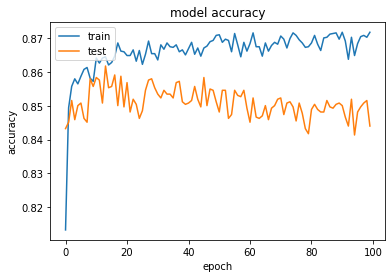

In [57]:
## summarizing history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

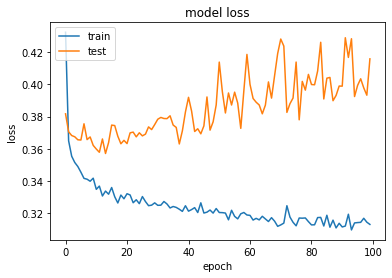

In [58]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [59]:
## part 3 making a prediction and evaluationg the model
## predicting the test set results
y_pred = classifier.predict(x_test)
y_pred = (y_pred>=0.5)

In [62]:
## make confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1557,   38],
       [ 252,  153]], dtype=int64)

In [63]:
## caluculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)

In [64]:
score

0.855

In [66]:
## to know the weights 
classifier.get_weights()

[array([[-1.2324442 , -2.5849025 ,  0.5939522 ,  1.0263749 , -1.0429891 ,
         -0.17817989, -0.7945607 , -1.3582891 ,  0.45026377,  0.43675235,
         -0.87936527],
        [-4.42132   , -0.39105296,  0.09984015, -1.578777  ,  3.2730653 ,
         -3.5847075 , -3.4615448 ,  2.8761895 ,  3.451079  , -4.881854  ,
         -1.0304399 ],
        [-0.6836868 , -0.03887492, -0.9491294 ,  0.29288173, -0.69255775,
          1.8665594 , -1.0525298 , -0.93716   ,  1.5930094 ,  0.36843792,
          0.26894197],
        [ 2.1365378 ,  0.6434583 ,  4.362786  , -2.3607478 ,  0.40281925,
          1.8897444 , -0.40221068, -3.145515  , -1.1894834 ,  0.5382134 ,
         -2.847064  ],
        [ 1.2014029 ,  4.503755  ,  3.5339482 ,  4.894455  , -0.19636   ,
         -1.0399758 , -2.4366856 , -4.563436  ,  3.3767323 ,  1.3119378 ,
         -0.14729615],
        [ 0.5633324 ,  0.5136232 ,  0.22940235, -0.47072637,  0.5725099 ,
          1.5643835 ,  1.666392  ,  0.45518595, -0.52438265, -0.1260000